In [1]:
import keras
import tensorflow as tf
import numpy as np
import sys
sys.path.append('../CustomLayers/')
from CustomLayers import *
from keras.layers import Input, Convolution2D, MaxPooling2D, Dropout, Dense, Flatten, BatchNormalization, AveragePooling2D, Activation, Reshape
from keras.models import Model
from keras import backend as K
from keras.datasets import cifar10
from keras.utils import np_utils

Using TensorFlow backend.


In [2]:
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

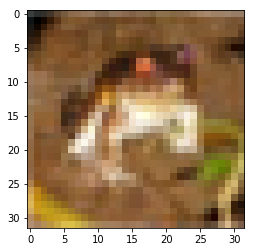

In [3]:
from matplotlib import pyplot as plt
%matplotlib inline
plt.imshow(X_train[0])

In [4]:
X_train = X_train.reshape(X_train.shape[0], 32, 32, 3)
X_test = X_test.reshape(X_test.shape[0], 32, 32, 3)
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255
# Convert 1-dimensional class arrays to 10-dimensional class matrices
Y_train = np_utils.to_categorical(y_train, 10)
Y_test = np_utils.to_categorical(y_test, 10)

In [5]:
img_w = 32
img_h = 32
img_c = 3
inp = Input(shape=(img_w, img_h, img_c))

z = Convolution2D(32, (3,3), activation='relu')(inp)
z = BatchNormalization()(z)
#z = BinLayer()(z)
z = BatchNormalization()(z)
#z = Convolution2D(32, (3,3), activation='relu')(z)
z = BinConv(32, (3,3), activation='relu')(z)
z = MaxPooling2D(pool_size=(2,2))(z)

z = BatchNormalization()(z)
z = Convolution2D(32, (3,3), activation='relu')(z)
z = MaxPooling2D(pool_size=(2,2))(z)

z = BatchNormalization()(z)
z = Convolution2D(32, (3,3), activation='relu')(z)
z = MaxPooling2D(pool_size=(2,2))(z)

z = BatchNormalization()(z)
z = Convolution2D(10, (1,1), activation='relu')(z)
z = AveragePooling2D(pool_size=(int(z.shape[1]), int(z.shape[2])))(z)
z = Reshape((10,))(z)
z = Activation('softmax')(z)

model = Model(inputs=inp, outputs=z)

In [6]:
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [7]:
model.fit(X_train, Y_train, 
          batch_size=32, epochs=3, verbose=1)

Epoch 1/3
50000/50000 [==============================] - 13s - loss: 1.4050 - acc: 0.5042    
Epoch 2/3
50000/50000 [==============================] - 11s - loss: 1.0563 - acc: 0.6314    
Epoch 3/3
50000/50000 [==============================] - 11s - loss: 0.9271 - acc: 0.6779    


In [8]:
score = model.evaluate(X_test, Y_test, verbose=0)
score

[0.94471054449081426, 0.6724]

In [9]:
g = tf.get_default_graph()
g.get_operations()

[<tf.Operation 'input_1' type=Placeholder>,
 <tf.Operation 'conv2d_1/random_uniform/shape' type=Const>,
 <tf.Operation 'conv2d_1/random_uniform/min' type=Const>,
 <tf.Operation 'conv2d_1/random_uniform/max' type=Const>,
 <tf.Operation 'conv2d_1/random_uniform/RandomUniform' type=RandomUniform>,
 <tf.Operation 'conv2d_1/random_uniform/sub' type=Sub>,
 <tf.Operation 'conv2d_1/random_uniform/mul' type=Mul>,
 <tf.Operation 'conv2d_1/random_uniform' type=Add>,
 <tf.Operation 'conv2d_1/kernel' type=VariableV2>,
 <tf.Operation 'conv2d_1/kernel/Assign' type=Assign>,
 <tf.Operation 'conv2d_1/kernel/read' type=Identity>,
 <tf.Operation 'conv2d_1/Const' type=Const>,
 <tf.Operation 'conv2d_1/bias' type=VariableV2>,
 <tf.Operation 'conv2d_1/bias/Assign' type=Assign>,
 <tf.Operation 'conv2d_1/bias/read' type=Identity>,
 <tf.Operation 'conv2d_1/convolution/Shape' type=Const>,
 <tf.Operation 'conv2d_1/convolution/dilation_rate' type=Const>,
 <tf.Operation 'conv2d_1/convolution' type=Conv2D>,
 <tf.Oper

In [10]:
from keras.layers import InputSpec